## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math
from numpy import linalg as la
from scipy.spatial.distance import cdist

In [36]:
clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

def dist(point1, point2):
    sum_=0
    for i in range(len(point1)):
        sum_+=((point1[i]-point2[i])**2)
    return math.sqrt(sum_)
    
def sum_dist(clust, centroid):
    sum_=0
    for point in clust:
        dist_=abs(dist(point, centroid))
        sum_+=dist_
    return sum_

print(f"Sum 'custom' is {sum_dist(clust, centroid)}")

centroid=[[-0.9774245525274352, -0.032635425821084516]]
dist_=cdist(centroid, clust, 'euclidean').sum()
print(f"Sum 'euclidean' is {dist_}")
dist_=cdist(centroid, clust, 'minkowski').sum()
print(f"Sum 'minkowski' is {dist_}")

Sum 'custom' is 11.440582444503534
Sum 'euclidean' is 11.440582444503534
Sum 'minkowski' is 11.440582444503534


### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

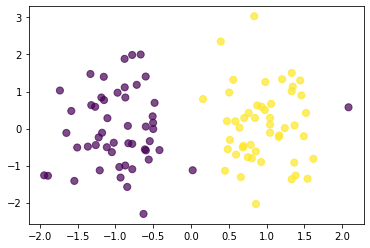

In [3]:
with open ('clustering.pkl', 'rb') as f:
    data_clustering=pickle.load(f)
# print(data_clustering)
X=np.array(data_clustering['X'])
Y=np.array(data_clustering['Y'])
plt.scatter (X[:,0], X[:,1], s=50, c=Y, marker='o', alpha=0.7)
plt.show()

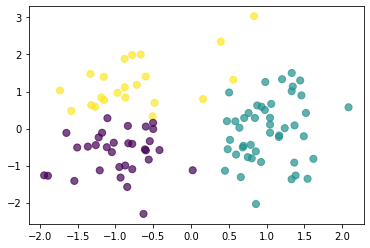

In [37]:
kmeans_model=KMeans(n_clusters=3, random_state=17)
kmeans_model.fit(X)
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_model.labels_, marker='o', alpha=0.7)
plt.show()

In [ ]:
# for i in range (2,7):
#     kmeans_model=KMeans(n_clusters=i, random_state=17)
#     kmeans_model.fit(X)
#     plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_model.labels_, marker='o', alpha=0.7)
#     plt.show()

### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

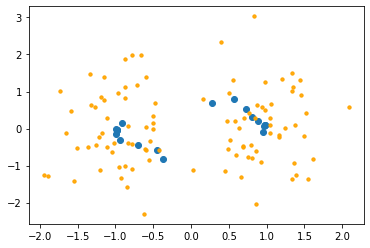

In [114]:
centers=list()
with open ('clustering.pkl', 'rb') as f:
    data_clustering=pickle.load(f)
# print(data_clustering)
X=np.array(data_clustering['X'])
Y=np.array(data_clustering['Y'])
n=10
for i in range (n):
    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
    kmeans_model.fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    center=kmeans_model.cluster_centers_
    centers.append(center)
cluster_centers_ =np.array(centers)
# print(cluster_centers_)
x_centroid=cluster_centers_[:,:,0:1]
y_centroid=cluster_centers_[:,:,1:2]
plt.scatter(x_centroid, y_centroid)
plt.scatter (X[:,0], X[:,1], s=10, c='orange', marker='o', alpha=0.7)
plt.scatter (X[:,0], X[:,1], s=10, c='orange', marker='o', alpha=0.7)
plt.show()

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.